In [1]:
# from google.colab import drive
# drive.mount('/content/MyDrive')

In [2]:
# %cd /content/MyDrive/MyDrive/ICG Comp


In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets.mnist import load_data

In [5]:
(x_train, y_train), (x_test, y_test) = load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [6]:
print("x_train.shape is",x_train.shape)
print("x_test.shape is",x_test.shape)
print("y_train.shape is",x_train.shape)
print("y_test.shape is",y_test.shape)

x_train.shape is (60000, 28, 28)
x_test.shape is (10000, 28, 28)
y_train.shape is (60000, 28, 28)
y_test.shape is (10000,)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

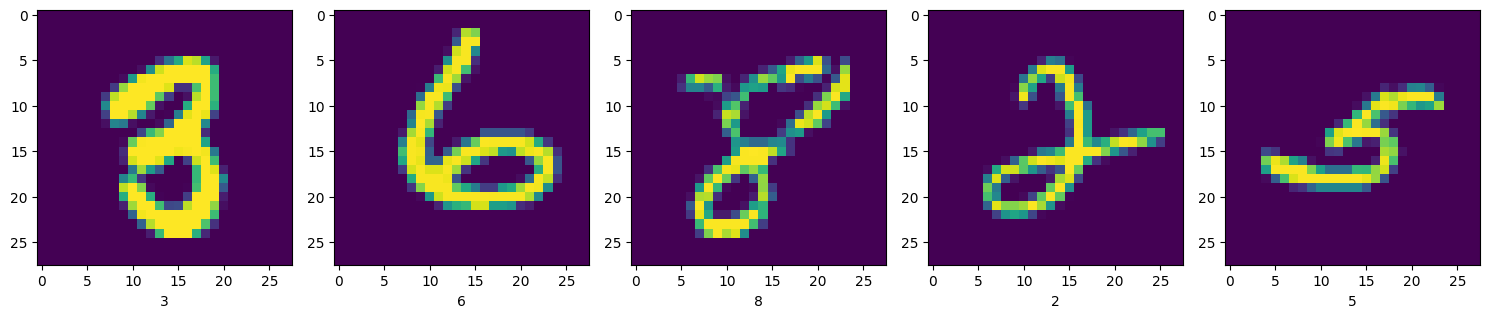

In [8]:
idc = np.random.randint(0,60000,size = 5)
plt.figure(figsize = (15,15))

for i in range(5):
  plt.subplot(1,5,i+1)
  j = idc[i]
  plt.imshow(x_train[j])
  plt.xlabel(y_train[j])
  plt.tight_layout()

In [9]:
one_inc = np.array(np.where(y_train == 1)[0])
zero_inc = np.array(np.where(y_train == 0)[0])

one_inc

array([    3,     6,     8, ..., 59979, 59984, 59994], dtype=int64)

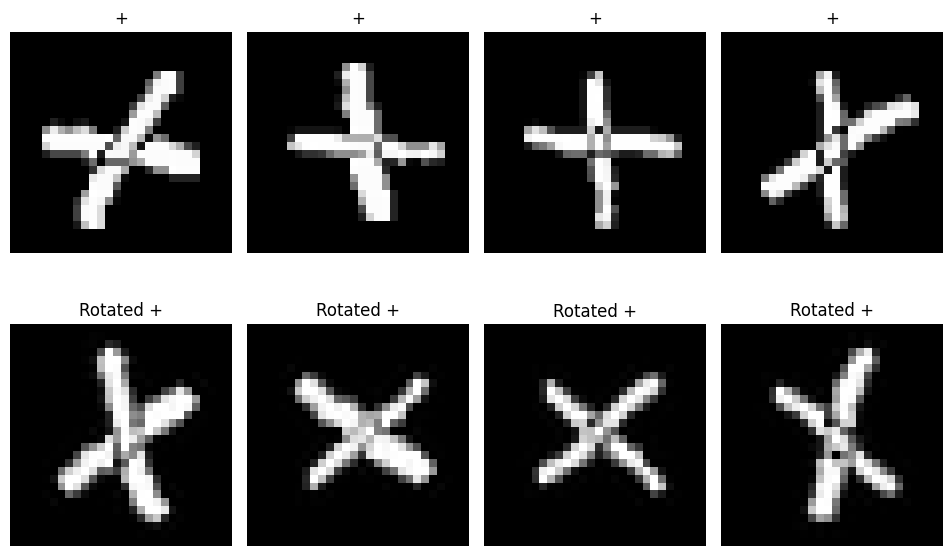

In [10]:
plt.figure(figsize = (12,6))
for i in range(4):
    j = one_inc[i]
    k = one_inc[i + 1]

    # Create an image by adding two original images
    img = x_train[j] + x_train[k].T

    # Plot the original image addition
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title('+')
    plt.axis('off')

    # Rotate the combined image by 45 degrees
    rotated_img = rotate(img, 45, reshape=False, mode='constant', cval=0)

    # Plot the rotated image addition
    plt.subplot(2, 5, i + 6)  # Use the next row of subplots
    plt.imshow(rotated_img, cmap='gray')
    plt.title('Rotated +')
    plt.axis('off')

plt.tight_layout()
plt.show()

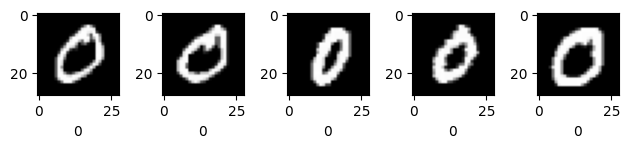

In [11]:
for i in range(5):
  plt.subplot(1,5,i+1)
  j = zero_inc[i]
  plt.imshow(x_train[j], cmap = 'gray')
  plt.xlabel(y_train[j])
  plt.tight_layout()

In [12]:
len(one_inc)

6742

In [13]:
len(zero_inc)

5923

In [14]:
len(np.where(y_test == 1)[0])

1135

In [15]:
len(np.where(y_test == 0)[0])

980

In [16]:
zeros = x_train[zero_inc] ##

In [17]:
import random

def select_random_pairs(m, n):
    if m > n * (n - 1) / 2:
        raise ValueError("Cannot select more pairs than available.")

    pairs = set()
    while len(pairs) < m:
        pair = (random.randint(0, n-1), random.randint(0, n-1))
        if pair[0] != pair[1] and pair not in pairs:
            pairs.add(pair)
    return list(pairs)


In [18]:
m = 1000  # Number of random pairs
n = 6742  # Range of integers from 0 to n-1
random_pairs = select_random_pairs(m, n)
print(random_pairs)

[(6389, 985), (4223, 3612), (2269, 6406), (3840, 6184), (767, 559), (2020, 4866), (4432, 2950), (6450, 1907), (5357, 4054), (2324, 3044), (2684, 3634), (3342, 1895), (3572, 2586), (1839, 1992), (1708, 5283), (520, 6298), (2618, 6654), (1610, 1858), (3796, 6150), (6187, 3595), (2665, 2555), (618, 3837), (2494, 3320), (1941, 6582), (2904, 3502), (2747, 4440), (6562, 5616), (3120, 1177), (2878, 66), (5659, 5965), (3584, 2852), (2396, 678), (4009, 5058), (4668, 5926), (3443, 2593), (461, 4536), (4749, 2616), (4158, 4274), (1075, 4853), (519, 5529), (2851, 1653), (701, 838), (4745, 943), (3895, 2759), (4014, 68), (421, 5659), (4827, 3484), (362, 487), (2663, 1175), (4827, 851), (4259, 4869), (5797, 3301), (5020, 3628), (3266, 2902), (656, 6056), (1510, 6080), (4060, 6447), (2227, 5348), (4964, 6207), (3370, 1418), (4625, 4108), (2189, 635), (1288, 4929), (6539, 5726), (3146, 3668), (4514, 1397), (6032, 705), (4582, 2080), (4873, 841), (6398, 512), (947, 215), (3251, 5), (266, 5735), (4359, 

In [19]:
# for i,j in random_pairs:
#   print(f"({i},{j})")

In [20]:
ones = []

for i,j  in random_pairs:
  img = x_train[one_inc[i]]+x_train[one_inc[j]].T
  rotated_img = rotate(img, 45, reshape=False, mode='constant', cval=0)
  ones.append(rotated_img)


In [21]:
ones = np.array(ones)

In [22]:
print(zeros.shape,ones.shape)

(5923, 28, 28) (1000, 28, 28)


In [23]:
zeros = list(zeros)

In [24]:
indices = np.where(y_test == 0)[0]
i=0
while len(zeros) < 1000:
  zeros.append(x_test[indices[i]])
  i += 1

In [25]:
zeros = np.array(zeros)

In [26]:
zeros.shape

(5923, 28, 28)

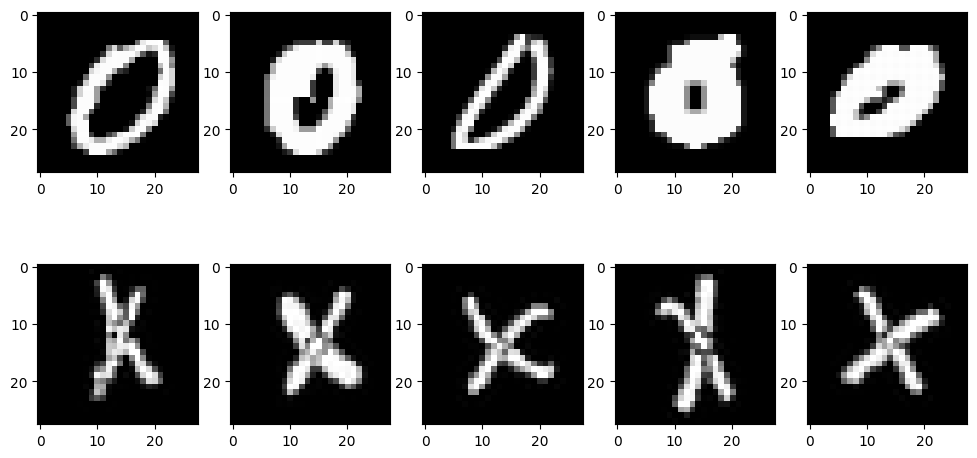

In [28]:
plt.figure(figsize = (12,6))

ind = np.random.randint(1000,size = 5)
for j in range(5):
  i = ind[j]
  plt.subplot(2,5,j+1)
  plt.imshow(zeros[i], cmap = 'gray')
  plt.subplot(2,5,j+6)
  plt.imshow(ones[i], cmap = 'gray')

In [29]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [30]:
import cv2

In [39]:
import os
os.makedirs('New_Images/crosses')
os.makedirs('New_Images/zeros')

In [40]:
for i in range(1000):
  cv2.imwrite(f'New_Images/crosses/{i}.png',ones[i])
  cv2.imwrite(f'New_Images/zeros/{i}.png',zeros[i])

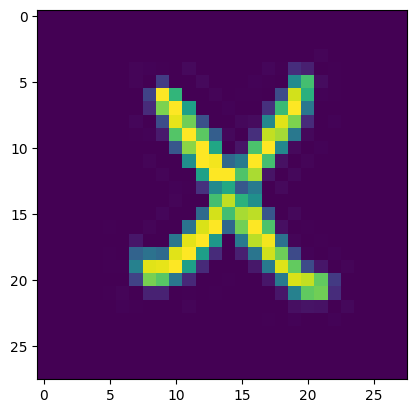

In [38]:
plt.imshow(ones[88])